# Working with data

## Data analysis

### The following data are given

-**Rk**: Rank of the player on the list.\
-**Player**: Name of the player.\
-**Pos**: Player's position (e.g., PF = Power Forward, C = Center, SG = Shooting Guard, etc.).\
-**Age**: Age of the player.\
-**Tm**: Team(s) the player played for (TOT indicates the combined stats for all teams).\
-**G**: Games played by the player.\
-**GS**: Games started by the player.\
-**MP**: Minutes played per game.\
-**FG**: Field goals made per game.\
-**FGA**: Field goals attempted per game.\
-**FG%**: Field goal percentage (FGM/FGA).\
-**3P**: Three-point field goals made per game.\
-**3PA**: Three-point field goals attempted per game.\
-**3P%**: Three-point field goal percentage (3PM/3PA).\
-**2P**: Two-point field goals made per game.\
-**2PA**: Two-point field goals attempted per game.\
-**2P%**: Two-point field goal percentage (2PM/2PA).\
-**eFG%**: Effective field goal percentage, which adjusts FG% to account for the fact that three-pointers are worth more than two-pointers.\
-**Formula**: (FG + 0.5 * 3P) / FGA.\
-**FT**: Free throws made per game.\
-**FTA**: Free throws attempted per game.\
-**FT%**: Free throw percentage (FTM/FTA).\
-**ORB**: Offensive rebounds per game.\
-**DRB**: Defensive rebounds per game.\
-**TRB**: Total rebounds per game (ORB + DRB).\
-**AST**: Assists per game.\
-**STL**: Steals per game.\
-**BLK**: Blocks per game.\
-**TOV**: Turnovers per game.\
-**PF**: Personal fouls per game.\
-**PTS**: Points scored per game.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('nba-player.csv')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


### Changing types form object to int64, float64

In [5]:
df.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

In [6]:
df.iloc[28].head()

Rk            Rk
Player    Player
Pos          Pos
Age          Age
Tm            Tm
Name: 28, dtype: object

In [7]:
df.drop(index=28,axis=1 , inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df.iloc[28].head()

Rk                  21
Player    Amari Bailey
Pos                 PG
Age                 19
Tm                 CHO
Name: 28, dtype: object

In [9]:
df.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

In [10]:
df[['Rk','Age', 'G', 'GS']] = df[['Rk','Age', 'G', 'GS']].astype(int);
ls_of_floats = ['PTS','PF', 'TOV', 'BLK', 'STL', 'AST', 'TRB', 'DRB', 'ORB', 'FTA', 'FT', '2PA', '2P', '3PA', '3P', 'FGA', 'FG', 'MP','FT%','FG%', '3P%', '2P%', 'eFG%']
df[ls_of_floats] = df[ls_of_floats].astype(float);

In [11]:
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

### Finding missing values in data

In [12]:
df.columns[df.isnull().any()]

Index(['FG%', '3P%', '2P%', 'eFG%', 'FT%'], dtype='object')

In [13]:
df[df["FG%"].isnull()][['FG', "FGA", "FG%"]]

,FG,FGA,FG%
79,0.0,0.0,NaN
127,0.0,0.0,NaN
270,0.0,0.0,NaN
321,0.0,0.0,NaN
330,0.0,0.0,NaN
374,0.0,0.0,NaN
517,0.0,0.0,NaN
607,0.0,0.0,NaN


### Handling missing data

In [14]:
df['FG%'].fillna(0, inplace=True);

/tmp/ipykernel_9371/2231758961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FG%'].fillna(0, inplace=True);


In [15]:
df["FG%"].isnull().sum()

0

In [16]:
df[df["3P%"].isnull()][['3P', '3PA', '3P%']]

,3P,3PA,3P%
23,0.0,0.0,NaN
24,0.0,0.0,NaN
52,0.0,0.0,NaN
67,0.0,0.0,NaN
68,0.0,0.0,NaN
69,0.0,0.0,NaN
79,0.0,0.0,NaN
105,0.0,0.0,NaN
126,0.0,0.0,NaN
127,0.0,0.0,NaN


In [17]:
df['3P%'].fillna(0, inplace=True);

/tmp/ipykernel_9371/3313680425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['3P%'].fillna(0, inplace=True);


In [18]:
df["3P%"].isnull().sum()

0

In [19]:
df[df["2P%"].isnull()][['2P', '2PA', '2P%']]

,2P,2PA,2P%
20,0.0,0.0,NaN
79,0.0,0.0,NaN
127,0.0,0.0,NaN
163,0.0,0.0,NaN
240,0.0,0.0,NaN
270,0.0,0.0,NaN
321,0.0,0.0,NaN
330,0.0,0.0,NaN
374,0.0,0.0,NaN
517,0.0,0.0,NaN


In [20]:
df['2P%'].fillna(0, inplace=True);

/tmp/ipykernel_9371/2068831819.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['2P%'].fillna(0, inplace=True);


In [21]:
df["2P%"].isnull().sum()

0

In [22]:
df[df["eFG%"].isnull()][['FG', '3P','FGA']]

,FG,3P,FGA
79,0.0,0.0,0.0
127,0.0,0.0,0.0
270,0.0,0.0,0.0
321,0.0,0.0,0.0
330,0.0,0.0,0.0
374,0.0,0.0,0.0
517,0.0,0.0,0.0
607,0.0,0.0,0.0


In [23]:
df['eFG%'].fillna(0, inplace=True);

/tmp/ipykernel_9371/2624429655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['eFG%'].fillna(0, inplace=True);


In [24]:
df["eFG%"].isnull().sum()

0

In [25]:
df[df["FT%"].isnull()][['FT', 'FTA','FT%']]

,FT,FTA,FT%
20,0.0,0.0,NaN
49,0.0,0.0,NaN
52,0.0,0.0,NaN
79,0.0,0.0,NaN
85,0.0,0.0,NaN
86,0.0,0.0,NaN
87,0.0,0.0,NaN
93,0.0,0.0,NaN
100,0.0,0.0,NaN
127,0.0,0.0,NaN


In [26]:
df['FT%'].fillna(0, inplace=True);

/tmp/ipykernel_9371/2423151504.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FT%'].fillna(0, inplace=True);


In [27]:
df["FT%"].isnull().sum()

0

In [28]:
df.isnull().sum().sum()

0

### Finding outliers

In [29]:
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = find_outliers(df[col])
    print(f"Outliers in '{col}':--------------------------------------------------------")
    print(outliers)
df.to_csv('filtered.csv')

Outliers in 'Rk':--------------------------------------------------------
Series([], Name: Rk, dtype: int64)
Outliers in 'Age':--------------------------------------------------------
325    39
Name: Age, dtype: int64
Outliers in 'G':--------------------------------------------------------
Series([], Name: G, dtype: int64)
Outliers in 'GS':--------------------------------------------------------
9      74
10     77
14     73
21     75
32     80
38     82
55     77
90     82
109    77
119    76
121    73
139    76
153    74
155    76
159    79
172    79
180    75
183    78
207    74
227    74
231    80
235    75
241    76
245    73
253    82
300    82
340    79
344    76
378    73
388    79
471    78
473    77
492    76
531    81
577    82
597    80
612    76
616    73
627    75
630    74
657    77
660    82
662    73
666    74
693    78
694    73
Name: GS, dtype: int64
Outliers in 'MP':--------------------------------------------------------
Series([], Name: MP, dtype: float64)
Outlier

# Visualization of data

## Succsed goals efficiency vs goal attempts for each team

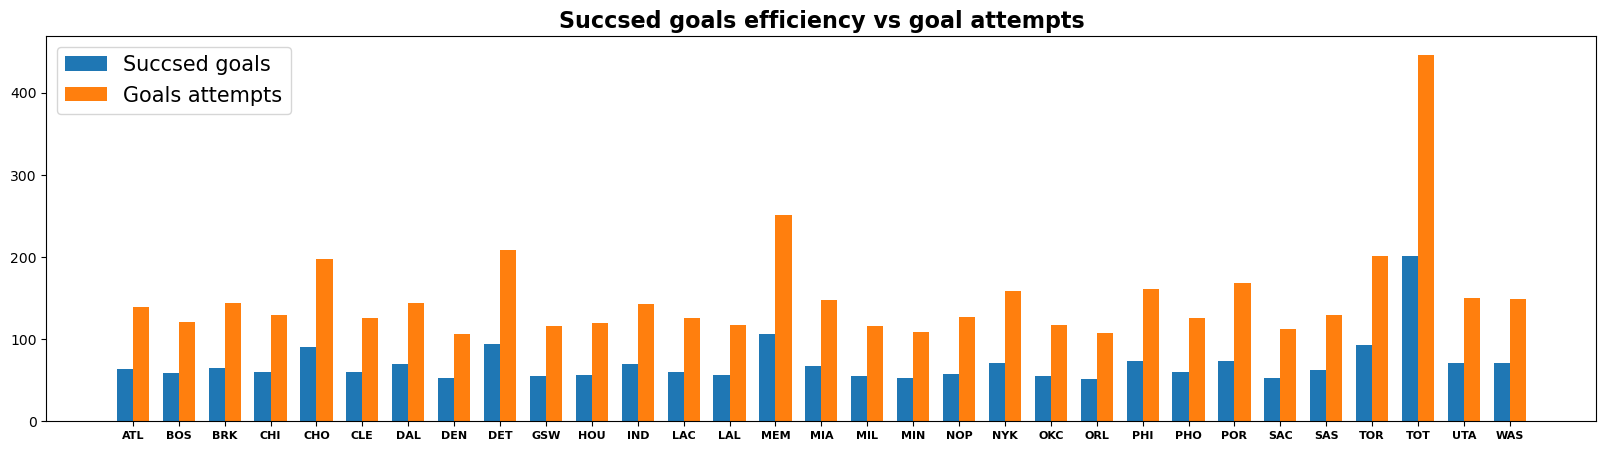

In [30]:
fga_sum = df.groupby('Tm')['FGA'].sum()
fg_sum = df.groupby('Tm')['FG'].sum()
fig, ax = plt.subplots(figsize=(20, 5))
plt.title("Succsed goals efficiency vs goal attempts",fontsize=16, fontweight='bold')
bar_width = 0.35
x = np.arange(fg_sum.shape[0])

ax.bar(x-bar_width/2, fg_sum, width=bar_width,label="Succsed goals")
ax.bar(x+bar_width/2,fga_sum,width=bar_width, label='Goals attempts')
ax.set_xticks(x)
ax.set_xticklabels(fg_sum.index, rotation=0, fontsize=8, fontweight='bold')
ax.legend(fontsize = 15)

The bar chart visualizes the efficiency of teams in converting their field goal attempts into successful goals:\
The two bars for each team provide a direct visual comparison between the total successful field goals (FG) and total field goal attempts (FGA). This helps to identify teams that are effective at scoring and the teams which need to work on their accuracy

-**CONCLUSION**\
You can use this visualization to determine which teams are the most efficient scorers or those who take many shots but convert fewer into points.

## Average points based on age

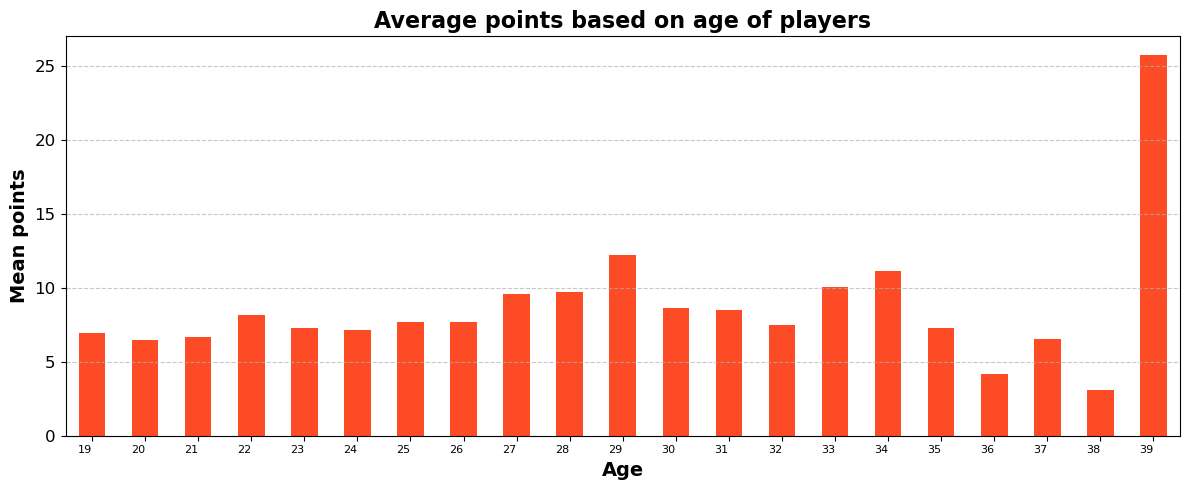

In [31]:
age_pts = df.groupby('Age')['PTS'].mean()
fig, ax = plt.subplots(figsize=(12, 5))
age_pts.plot(kind='bar', color='#fd4b25', ax=ax)

plt.title('Average points based on age of players', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Mean points', fontsize=14, fontweight='bold')

plt.xticks(rotation=0, ha='right', fontsize=8)
plt.yticks(fontsize=12)

ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The bar chart illustrates how average points scored by basketball players vary with age:\
Generally, you might expect younger players to show rapid improvement as they gain experience, while older players may either maintain or decline in performance depending on their physical condition and playing style.\
If certain age groups show unexpectedly high or low averages, it could indicate unique player attributes.

-**CONCLUSION**\
This visualization provides a useful overview of how player age correlates with scoring ability, allowing for analysis of player development and decline.

In [32]:
df[df['Age'] == 39]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
325,250,LeBron James,PF,39,LAL,71,71,35.3,9.6,17.9,...,0.75,0.9,6.4,7.3,8.3,1.3,0.5,3.5,1.1,25.7


## Players average statistcs based on position

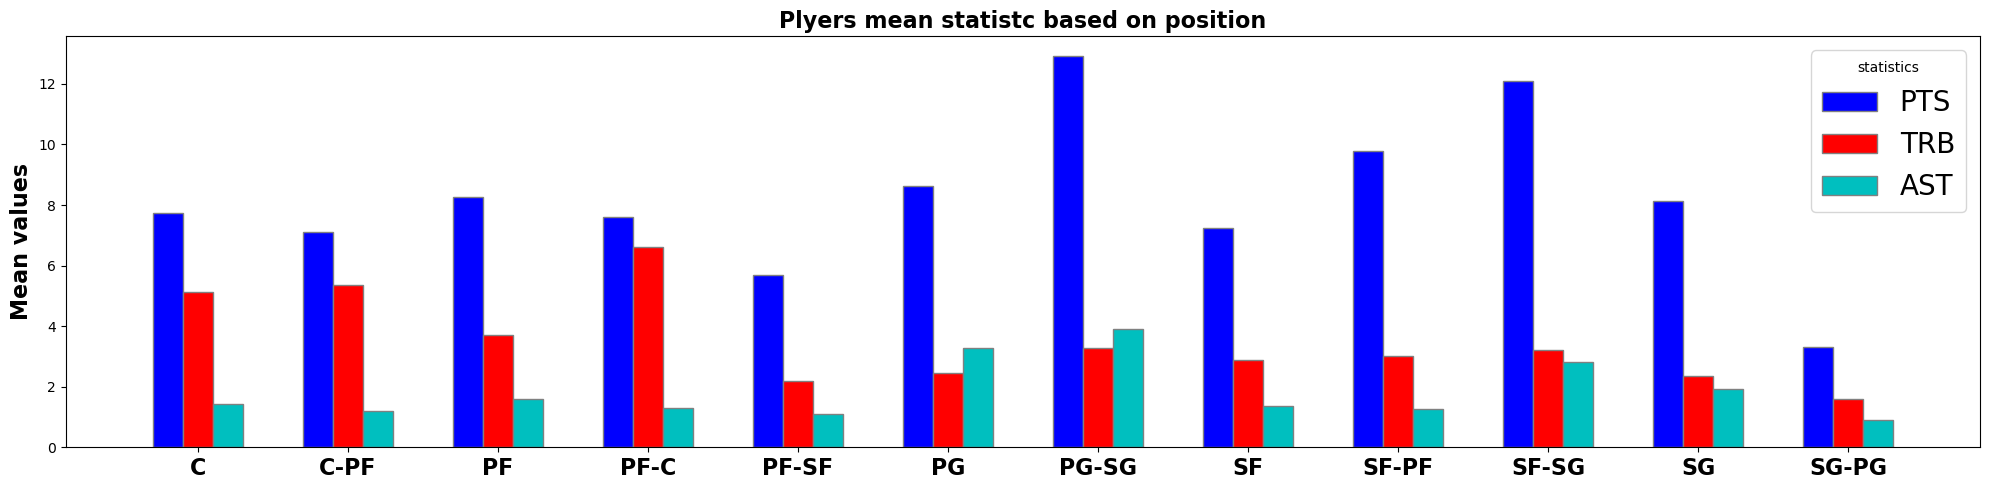

In [33]:
average_stats = df.groupby('Pos')[['PTS', 'TRB', 'AST']].mean().reset_index()
positions = average_stats['Pos']
pts = average_stats['PTS']
trb = average_stats['TRB']
ast = average_stats['AST']

bar_width = 0.2
r1 = range(len(positions))  
r2 = [x + bar_width for x in r1]  
r3 = [x + bar_width for x in r2]  

plt.figure(figsize=(20, 5))

plt.bar(r1, pts, color='b', width=bar_width, edgecolor='grey', label='PTS')
plt.bar(r2, trb, color='r', width=bar_width, edgecolor='grey', label='TRB')
plt.bar(r3, ast, color='c', width=bar_width, edgecolor='grey', label='AST')

plt.title('Plyers mean statistc based on position', fontsize=16, fontweight='bold')
plt.ylabel("Mean values",fontsize=16, fontweight='bold')
plt.xticks([r + bar_width for r in range(len(positions))], positions, fontsize=16, fontweight='bold')
plt.legend(title='statistics',fontsize=20)

plt.tight_layout()
plt.show()

The grouped bar chart visualizes the average statistics for points (PTS), total rebounds (TRB), and assists (AST) for players across different positions.\
-The chart allows for easy comparison of average performance metrics across different player positions, such as Guards (PG, SG), Forwards (SF, PF), and Centers (C).\
-Typically, you may observe that Centers and Power Forwards have higher average rebounds (TRB), while Guards might show higher average assists (AST).

-**CONCLUSION**\
By examining this chart, you can understand the typical contributions expected from players in different positions, revealing how certain positions are specialized  in specific statistical categories.

## Succsed free throws efficiency vs free throws attempts for each team

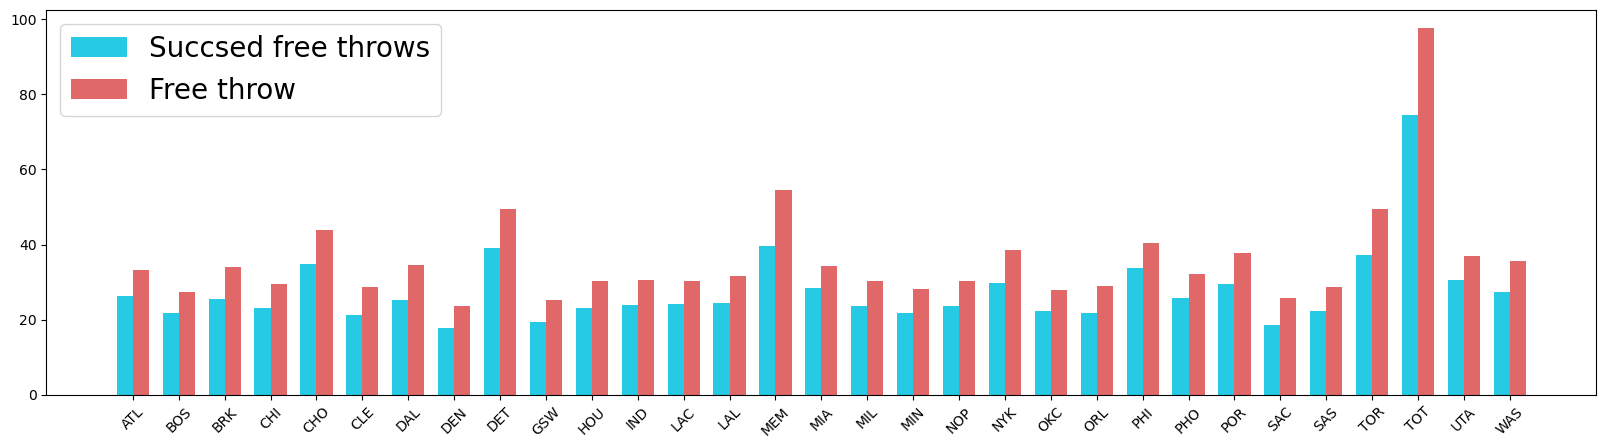

In [34]:
ft_sum = df.groupby('Tm')['FT'].sum()
fta_sum = df.groupby('Tm')['FTA'].sum()
fig, ax = plt.subplots(figsize=(20, 5))
bar_width = 0.35
x = np.arange(fg_sum.shape[0])

ax.bar(x-bar_width/2, ft_sum, width=bar_width,label="Succsed free throws", color='#27cae4')
ax.bar(x+bar_width/2,fta_sum,width=bar_width, label='Free throw', color='#e06868')
ax.set_xticks(x)
ax.set_xticklabels(fg_sum.index, rotation=45)
ax.legend(fontsize = 20)

The two bars for each team allow for a direct comparison between the number of successful free throws and total free throw attempts:\
This comparison can indicate which teams are more effective at converting their free throw attempts into points.\
Teams with a large difference between the two bars may show low effectiveness in converting attempts into successful free throws and possibly suggesting the need for improvement in shooting skills.

-**CONCLUSION**\
This chart allows for both efficiency and volume comparisons of free throws across different teams, highlighting which teams are stronger or weaker in this aspect of the game.

## Distribution of points scored 

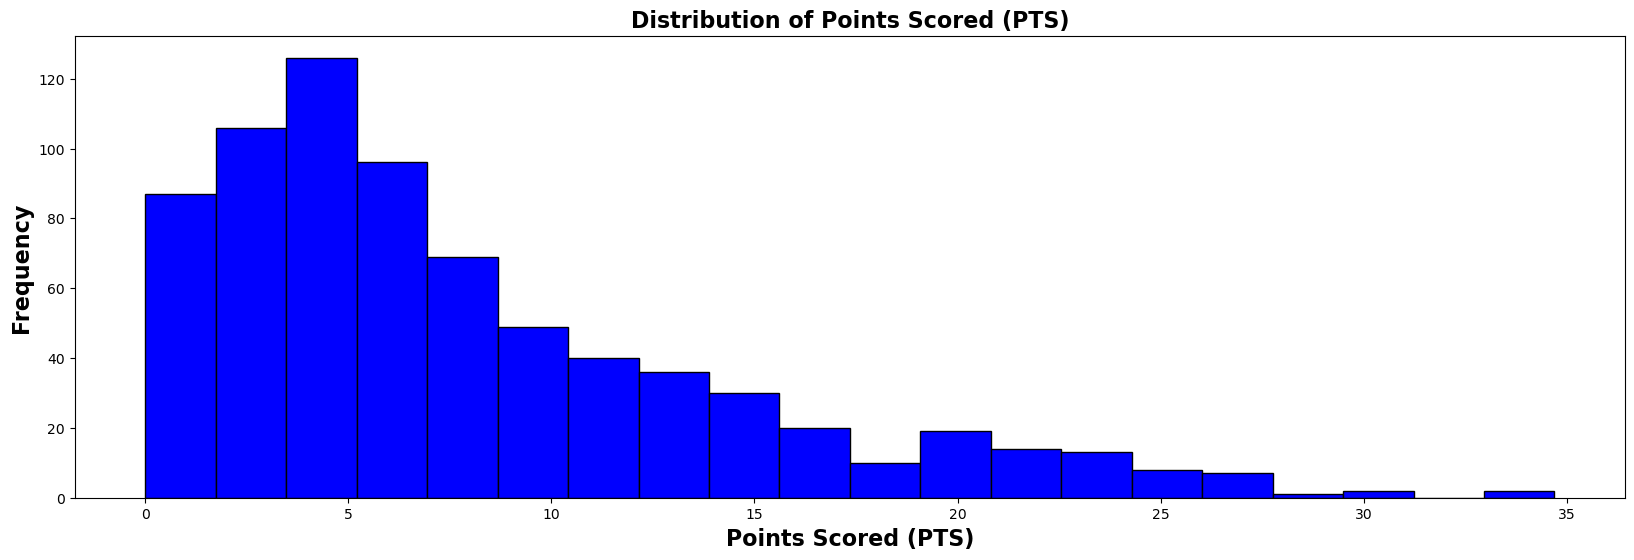

In [35]:
plt.figure(figsize=(20, 6))
plt.hist(df['PTS'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Points Scored (PTS)', fontsize=16, fontweight='bold')
plt.xlabel('Points Scored (PTS)',fontsize=16, fontweight='bold')
plt.ylabel('Frequency',fontsize=16, fontweight='bold')
plt.show()

The histogram visualizes the frequency distribution of points scored by players:\
The shape of the histogram can indicate whether scoring is concentrated around certain values or is more evenly spread out.\
Bars at the far right of the histogram could indicate a few high-scoring players, showing that while most players may score fewer points, a select few score significantly higher.

-**CONCLUSION**\
This histogram will give a clear picture of how points scored are distributed among the players and help identify common scoring ranges, as well as any potential outliers.

## Total Rebounds by Position

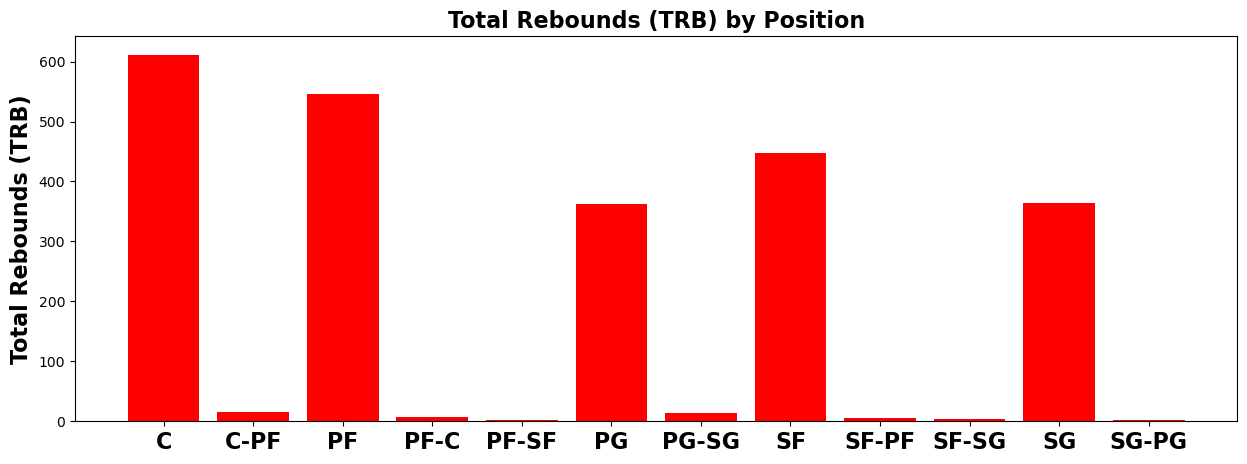

In [36]:
position_groups = df.groupby('Pos')['TRB'].sum()
plt.figure(figsize=(15, 5))
plt.bar(position_groups.index, position_groups.values, color='red')
plt.title('Total Rebounds (TRB) by Position',fontsize=16, fontweight='bold')
plt.ylabel('Total Rebounds (TRB)', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=16, fontweight='bold')
plt.show()

**The bar chart visualizes how total rebounds are distributed across different player positions, such as Guards, Forwards, and Centers. In general:**\
-Centers (C) and Power Forwards (PF) are expected to have the highest total rebounds due to their proximity to the basket and primary role in rebounding.\
-Small Forwards (SF) might contribute moderately to rebounds.\
-Guards (PG, SG) usually have the lowest total rebounds, as they typically play further from the basket and focus on ball-handling and scoring.\
-This visualization helps highlight the differences in how player positions contribute to rebounding based on their on-court roles.

-**CONCLUSION**\
This chart will help you understand the rebounding contributions based on player positions, highlighting the roles that different positions play in this key statistic.

## Minutes played vs points

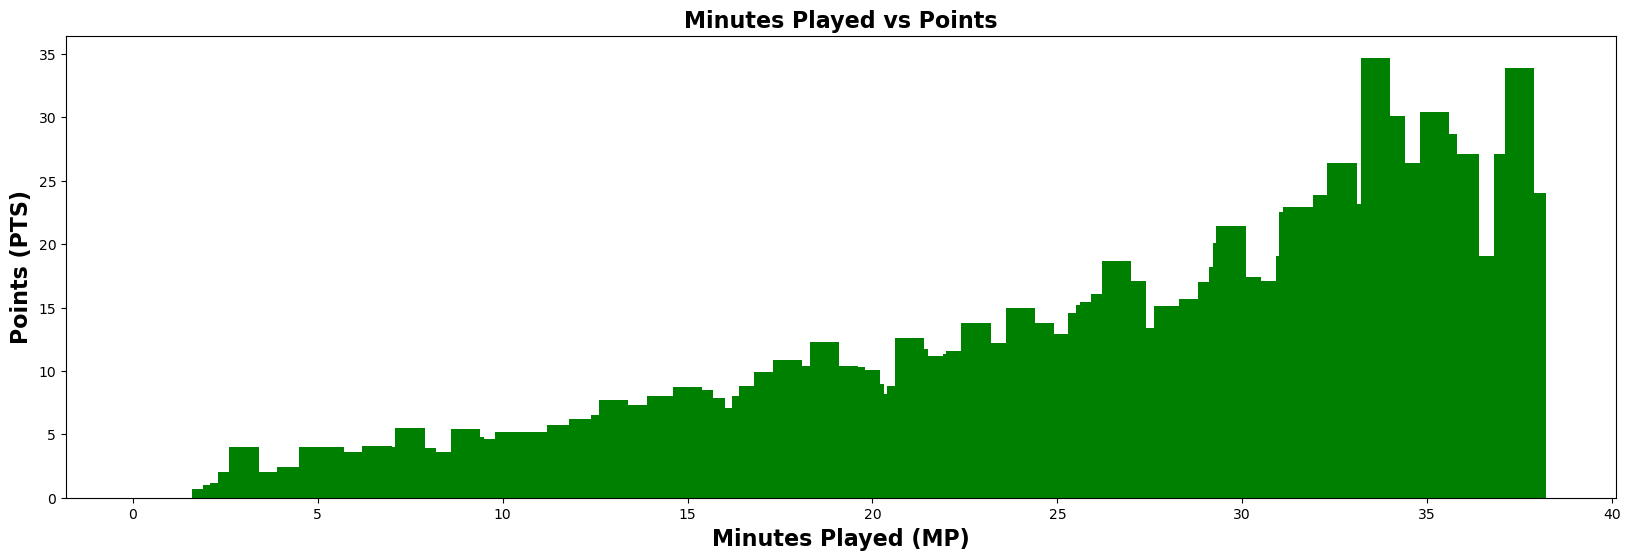

In [37]:
plt.figure(figsize=(20, 6))
plt.bar(df['MP'], df['PTS'], color='green')
plt.title('Minutes Played vs Points', fontsize=16, fontweight='bold')
plt.xlabel('Minutes Played (MP)', fontsize=16, fontweight='bold')
plt.ylabel('Points (PTS)', fontsize=16, fontweight='bold')
plt.show()

The plot shows the relationship between the time a player spends on the court and the points they score. Typically, as the minutes played increase, players tend to score more points, although there can be some outliers (players who score efficiently in fewer minutes or those who play longer but don't score much).

-**CONCLUSION**\
This scatter plot will help you see how points scored vary with minutes played more clearly, allowing for a better understanding of player performance.

## Statistics of Top 10 players

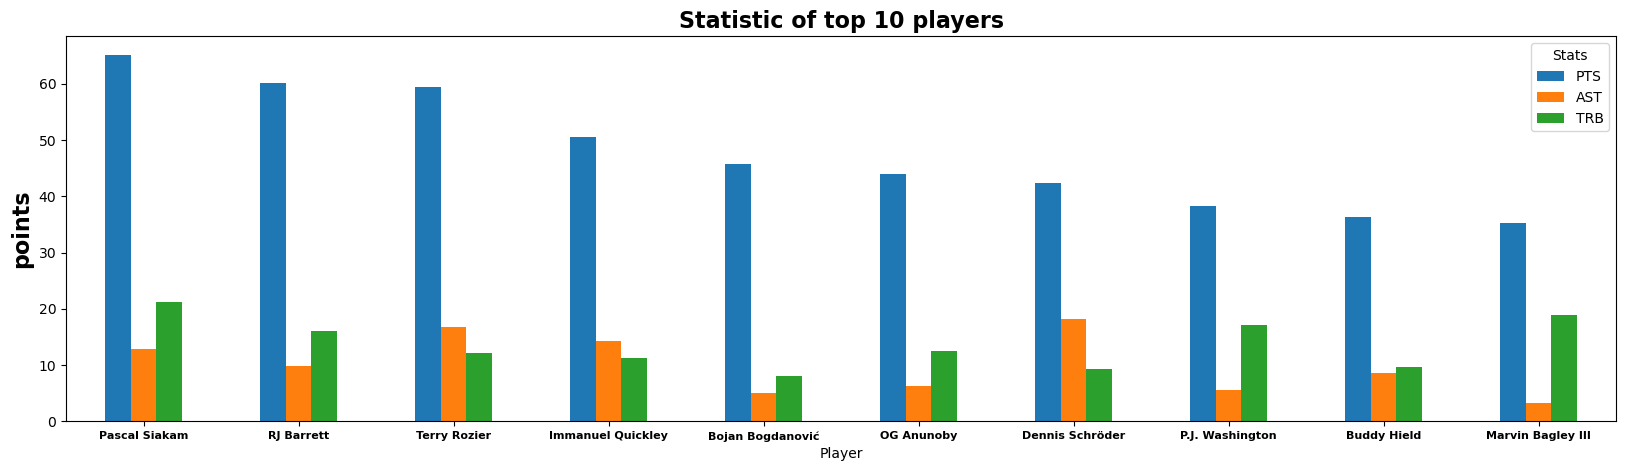

In [40]:
top_players_stats = df.groupby('Player')[['PTS', 'AST', 'TRB']].sum().nlargest(10, 'PTS')

top_players_stats.plot(kind='bar', figsize=(20, 5))
plt.title('Statistic of top 10 players', fontsize=16, fontweight='bold')
plt.ylabel('points', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=8, fontweight='bold')
plt.legend(title='Stats')
plt.show()

The chart clearly identifies the top 10 players based on their scoring ability. This allows for an immediate understanding of who the most effective scorers are in the dataset.

-**CONCLUSION**\
This visualization effectively shows the high performances in the league and provides insights into the multifaceted roles these players have.